[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/omar-merhebi/hlc-python/blob/master/Lesson_6_NumPy/Lesson_6_NumPy_updated.ipynb)

# NumPy

The python package **NumPy** is an indespensible tool for efficient data manipulation and numerical processing. 
It is a highly curated and tested collection of functions centered around the manipulation of thier proprietary data type, the `numpy.array`. 
The `numpy.array` is similar to the standard `list` type, but it has some important differences that make it particularly useful for generic vector and matrix algebra and element-wise data manipulation.

## Learning objectives 
* What is scientific computing?
* What is NumPy?
* What are the benefits of NumPy?
* What is a `numpy.array`, and why use it?
* Where is the NumPy documentation located? Right [here](https://numpy.org/doc/stable/reference/index.html)!

## What's the deal with NumPy?

[**NumPy**](https://numpy.org/) is the foundational Python package for scientific computing.
Scientific computing encompasses any tools, functions, or algorithms that are used to generate or simulate mathematical models and problems. 
Python in its base form is fine for some data manipulation with support for generic algorithm construction (e.g. loops and function declaration), but as soon as you need to do any mathematics, especially on a large scale (e.g. large data sets), generic Python falls short with respect to efficient built-in functionality.
NumPy is a heavily curated and tested package that contains thousands, if not hundreds of thousands, of useful functions for generic mathematical manipulation of your data.
This includes general mathematics, like find the natural logarithm, as well as general statistics, like the variance and quanitles.
These included functions are also very effienct with respect to compuational time and memory, so they should be used whenever possible.

So what makes NumPy so efficient? 
Part of the efficiency comes from the the fact that the algorithms used behind the scenes are tuned to be as efficient as possible by dedicated computer scientists.
Another reason that the code is efficient is that large chunks of the code are written in *C* and *C++* rather than in Python.
A pre-compiled *C* or *C++* function is called by NumPy to execute your code, and the results are passed back to you in Python. 
It is not necessarily important to understand why this is more efficient, but it is important to point out that it is done in this manner because it is more efficient than strictly using Python.
They are playing 4-dimensional chess while you are playing checkers, metaphorically, so there is no use in reinvinteing the wheel with respect to creating homemade functions.

A final reason that NumPy is so efficient is the introduction of the `numpy.array`.
The `numpy.array` is a generic n-dimensional array object.
The easiest way to think about it is that a `numpy.array` is an n-dimensional matrix which can be used to store and manipulate your data or just do simple matrix and vector algebra.
The reason this object is more efficient than the standard Python `list` is how the memory is stored in each case.
In a standard `list` all of the members are stored in random spots in memory, so when they need to be accessed, the computer has to search around for them.
In a `numpy.array` all of the data points are stored in sequential memory.
This means that if you are at a point in your array, `my_array[a][b][c]`, and want to access the adjacent piece of data, `my_array[a][b][c+1]`, the computer can just accesses the adjacent memory address instead of searching through all of the memory for the correct piece of data.
In the previous example `my_array` designates a 3-dimensional array as seen by the three different indexes following the `my_array` call.
Most functions in Numpy are built around manipulating these objects, and are coded in such a way as to take advantage of the memory allocation in an optimal way, and are therefore very efficient.

In order to demonstrate the power of NumPy, we can start with the standard dot product. In the code block below we generate two vectors of length 1000 and store them in `numpy.array` objects and `list` objects. We create a generic function, `my_dot_0`, that takes the dot product of two input vectors using a standard for loop. We then time the output.  

In [2]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# np is the standard abbreviation for numpy
import numpy as np 
import matplotlib.pyplot as plt

# Numpy Arrays
### Why Arrays?

**Reason 1:** It makes math simpler when you have many data points.
Let's create a list containing the numbers 0 through 5 and assign it to a variable:

In [4]:
# Create a list containing the numbers 0 through 4 called small_list
# assign it to a variable named data
small_list = [0, 1, 2, 3, 4]

Now, let's try doing some simple math on this list. Let's add 1 to each of the items in the list. Is there a simple way to do this?

In [5]:
small_list + 1

TypeError: can only concatenate list (not "int") to list

In [6]:
for i in small_list:
    small_list[i] += 1
print(small_list)

[1, 2, 3, 4, 5]


Now let's try to do the same operation with a numpy array. 

In [7]:
# First, let's reset our data variable to it's original values
small_list = [0, 1, 2, 3, 4]
# Now, we'll convert our list of values to a numpy array, called arr
arr = np.array(small_list)

# Let's see what the array looks like
arr

array([0, 1, 2, 3, 4])

In [8]:
# Check the data type of your new array
type(arr)

numpy.ndarray

Now, try adding 1 to every element of our array.

In [9]:
arr + 1

array([1, 2, 3, 4, 5])

We can also perform mathematical operations between two numpy arrays. For example, we can add our array `arr` to itself or multiply it by itself:


In [10]:
# Add arr to itself
arr + arr

array([0, 2, 4, 6, 8])

In [11]:
# Multiply arr by itself
arr * arr

array([ 0,  1,  4,  9, 16])

Working with numpy arrays can also be much faster than working with lists.
Let's calculate how long it takes to get the sum of numbers in a list.

In [12]:
# Make a list of numbers 0 to 10,000,000 - store in variable big_list
big_list = list(range(0,10000001))

# Print time to sum
%timeit -n 10 tmp = sum(big_list)

51.3 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now, let's see how long the same operation takes using the `np.sum` function with a numpy array. 
We could convert the `big_list` we've already made to a numpy array but, assuming we don't already have a list of numbers, let's make an array with the same values using numpy's `np.arange` function.
`np.arange` makes a list of consecutive numbers given starting and stopping numbers and a step size.

In [13]:
# Make a numpy array of numbers 0 to 10,000,000 - store in variable big_array
big_array = np.arange(start = 0, stop = 10000000, step = 1)

# Print time to sum
%timeit -n 10 tmp = np.sum(big_array)

1.88 ms ± 587 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numpy functions can improve the efficiency of our code when working with numpy arrays. But what happens if we try to use numpy functions on lists? Let's use the `np.sum` function on our big_list.

In [14]:
# Print time to sum
%timeit -n 10 tmp = np.sum(big_list)

503 ms ± 44.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notice that the `list` test really struggles, comparitively. 

Together, these examples should highlight:
1. NumPy functions are very efficient.
2. NumPy functions are relatively easy to use and clean up your code.
3. NumPy functions work best with `numpy.array` objects.
4. If you can find a NumPy function to handle your `numpy.array` objects, you should use it rather than trying to build your own function.

Numpy `arrays` operate very similarly to python `lists`, **we can grab individual items using the same syntax:**

In [15]:
# Access the second element of the numpy array
arr[1]

1

In [16]:
# Access the first three elements in the numpy array
arr[0:3]

array([0, 1, 2])

In addition to `np.arange`, numpy has some other helpful functions to make long lists without having to type out all the numbers individually.
* `np.arange` Return evenly spaced values within a given interval.
* `np.linespace` Return evenly spaced numbers over a specified interval.
* `np.zeros` Return a new array of given shape and type, filled with zeros.
* `np.random.randn` Return a samples from the “standard normal” distribution.

In [17]:
# Get numbers starting at 0 and ending at 10 by 2s
np.arange(start = 0, stop = 10, step = 2)

array([0, 2, 4, 6, 8])

In [18]:
# Get 5 numbers between 0 and 10
np.linspace(start = 0 , stop = 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [19]:
# Get an array of 10 zeros
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# Get an array of 10 numbers sampled from the normal distribution
np.random.randn(10)

array([-3.53397748e-01,  1.53072127e-02,  1.37307951e-01, -4.94157630e-01,
        1.20134644e+00, -1.38603797e+00,  5.31743438e-01,  8.19867608e-01,
        1.34273015e-03, -1.56128552e+00])

### 2D Array

In [21]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(arr_2d)

[[1 2 3]
 [4 5 6]]


Note that when creating a 2D numpy array, the numbers provided in the lists must be able to fill all elements of a matrix of some dimensions N x M. Let's see what happens when we provide a list of lists that won't fill a matrix:

In [22]:
my_array = np.array([[1, 2, 3], [4, 5]])
print(my_array)

[list([1, 2, 3]) list([4, 5])]


/var/folders/38/6wqv63757bl5bj6hh0w_vrpm0000gn/T/ipykernel_36493/1975936186.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  my_array = np.array([[1, 2, 3], [4, 5]])


#### Subsetting a 2D Matrix
We can also use square brackets (`[]`) to subset 2D arrays. First we specify the rows we want to subset, then the columns.

In [23]:
# Access the element in the first row and second column
arr_2d[0, 1]

2

In [24]:
# Access all elements in the first row
arr_2d[0, :]

array([1, 2, 3])

We can use the `.shape` attribute to get the number of rows and columns in our array.

In [25]:
# Get the shape of the 2D array
arr_2d.shape

(2, 3)

We can also make a 2D array from a 1D array using the `.reshape` function. For example, if we want to make a 10x10 matrix of consecutive numbers, we can first make an array of 100 numbers using `np.arange`, then use `.reshape` to format the matrix.

In [26]:
numbers = np.arange(start = 0, stop = 100)
numbers_2d = numbers.reshape(10, 10)
numbers_2d

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

If we wanted to change the shape of our matrix, we could do this with the `resize` function. Note that this changes the attributes of the matrix we supply, so nothing is returned from this function.

In [27]:
numbers.resize((20, 5))
numbers

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

If we wanted to find the location of a specific value in our array, we can use the `np.where` function.
* `np.where` generates a tuple of arrays that show the indices of where the trues are located. The tuple that np.where generates will always have the same dimension as the array queried

In [28]:
# Find the location of the number 10 in out numbers array
np.where(numbers == 10)

(array([2]), array([0]))

## Matrix Manipulation
At some point it might also be helpful to sort data within an array, find specific instances of things within an array, delete rows or columns, or add data. 
This can all be done using NumPy's built in functions as well. 
In the following example we will try to use NumPy to manipulate a data set in a way that would potentially be useful for your own data. 
We can also run some simple statistics for fun!

In [29]:
# generate a 5x30 array full or of random numbers
a0 = np.random.randn(100, 5)
a0

array([[-3.14855494e-01,  3.71367932e-01, -3.31407254e-01,
         1.52467688e+00,  7.30943996e-01],
       [ 6.67277897e-02,  6.47971920e-01, -1.88603713e+00,
         1.12133017e+00,  1.50434881e+00],
       [-1.68757298e-01, -1.99184057e-01, -4.71062034e-01,
        -2.31285643e+00, -4.99892371e-01],
       [-3.88371856e-01, -1.56449620e-01,  1.21757212e-01,
        -1.41990300e+00,  6.94329415e-01],
       [ 5.16146013e-01,  1.22625465e+00,  8.82429703e-01,
        -1.31450642e-01,  3.92197673e-01],
       [ 1.00102213e+00, -3.75739470e-02, -6.97909608e-01,
         1.74618914e-01, -7.02232001e-01],
       [-5.54800792e-01, -1.95844857e-01,  1.10100412e+00,
         1.75362942e-01,  1.22027644e+00],
       [-1.09024356e+00, -1.71249263e-01, -1.02401483e+00,
        -7.13873614e-02, -1.42296626e+00],
       [-3.35179627e-01,  1.66456934e+00, -1.07475125e+00,
        -1.12168157e+00, -1.44986101e+00],
       [-8.41526429e-01,  7.81430471e-01, -2.50843171e-01,
        -1.48265196e+00

In [30]:
# pretend that one of the data points was unfilled, or a NaN
a0[2][3] = np.nan
a0

array([[-3.14855494e-01,  3.71367932e-01, -3.31407254e-01,
         1.52467688e+00,  7.30943996e-01],
       [ 6.67277897e-02,  6.47971920e-01, -1.88603713e+00,
         1.12133017e+00,  1.50434881e+00],
       [-1.68757298e-01, -1.99184057e-01, -4.71062034e-01,
                    nan, -4.99892371e-01],
       [-3.88371856e-01, -1.56449620e-01,  1.21757212e-01,
        -1.41990300e+00,  6.94329415e-01],
       [ 5.16146013e-01,  1.22625465e+00,  8.82429703e-01,
        -1.31450642e-01,  3.92197673e-01],
       [ 1.00102213e+00, -3.75739470e-02, -6.97909608e-01,
         1.74618914e-01, -7.02232001e-01],
       [-5.54800792e-01, -1.95844857e-01,  1.10100412e+00,
         1.75362942e-01,  1.22027644e+00],
       [-1.09024356e+00, -1.71249263e-01, -1.02401483e+00,
        -7.13873614e-02, -1.42296626e+00],
       [-3.35179627e-01,  1.66456934e+00, -1.07475125e+00,
        -1.12168157e+00, -1.44986101e+00],
       [-8.41526429e-01,  7.81430471e-01, -2.50843171e-01,
        -1.48265196e+00

Let's say we want to be able to find the location of that NaN. We can do this with `np.where` and `np.isnan`.
* `np.isnan` sets all instances of nan to true within the array, everything else is false

In [31]:
# Find the location of the NaN value and store it in a variable named where_nan
where_nan = np.where(np.isnan(a0))
where_nan

(array([2]), array([3]))

Now that we know where the NaN value is located, we could delete the row or column that data point is in

In [32]:
# since the NaN would mess up our data we could delete the row it is located in
row_delete = np.delete(a0, where_nan[0], 0)
row_delete.shape

(99, 5)

In [33]:
# we could do the same thing if we wanted the column gone instead
col_delete = np.delete(a0, where_nan[0], 1)
col_delete.shape

(100, 4)

We could also replace the NaN with some value. For example, let's replace the NaN with a zero. We can do this by using other, optional, arguments in the `np.where` function.

In [34]:
# the tilde (~) flips the boolean values since np.where replaces false not true
# unlike the previous np.where usage, this outputs our original array with replacements
replace_nan = np.where(~np.isnan(a0), a0, 0.)
replace_nan

array([[-3.14855494e-01,  3.71367932e-01, -3.31407254e-01,
         1.52467688e+00,  7.30943996e-01],
       [ 6.67277897e-02,  6.47971920e-01, -1.88603713e+00,
         1.12133017e+00,  1.50434881e+00],
       [-1.68757298e-01, -1.99184057e-01, -4.71062034e-01,
         0.00000000e+00, -4.99892371e-01],
       [-3.88371856e-01, -1.56449620e-01,  1.21757212e-01,
        -1.41990300e+00,  6.94329415e-01],
       [ 5.16146013e-01,  1.22625465e+00,  8.82429703e-01,
        -1.31450642e-01,  3.92197673e-01],
       [ 1.00102213e+00, -3.75739470e-02, -6.97909608e-01,
         1.74618914e-01, -7.02232001e-01],
       [-5.54800792e-01, -1.95844857e-01,  1.10100412e+00,
         1.75362942e-01,  1.22027644e+00],
       [-1.09024356e+00, -1.71249263e-01, -1.02401483e+00,
        -7.13873614e-02, -1.42296626e+00],
       [-3.35179627e-01,  1.66456934e+00, -1.07475125e+00,
        -1.12168157e+00, -1.44986101e+00],
       [-8.41526429e-01,  7.81430471e-01, -2.50843171e-01,
        -1.48265196e+00

Now, let's plot some of the data we generated!

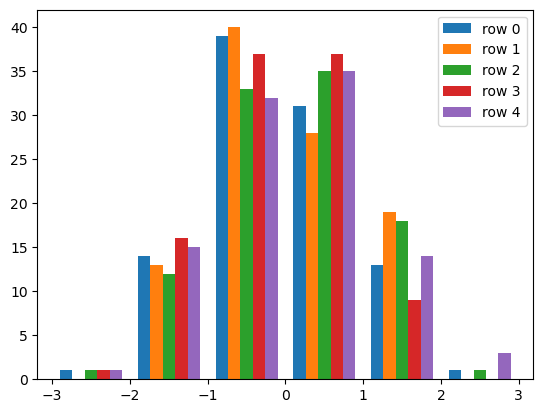

In [35]:
# we can take extract the rows using standard indexing
# we then have to take the transpose of the data so that the plt.hist function will read the data correctly
hist = plt.hist(replace_nan, [-3, -2, -1, 0, 1, 2, 3])
plt.legend(["row 0", "row 1","row 2","row 3","row 4"])

We can output the mean and variance as well to see if it matches the expected 0,1, given the normal distribution we sampled from.

In [36]:
# calculate the mean of each column
mean = np.average(replace_nan, axis = 0)
print(mean)

[-0.02262902  0.03083949  0.08163679 -0.1795942   0.04645327]


In [37]:
# calculate the variance of each column
variance = np.var(replace_nan, axis = 0)
print(variance)

[0.86643599 0.81228623 0.80475494 0.72727784 0.91654178]


# In class exercise

In this exercise we will walk through some of the stuff we have covered previously and introduce some new helper functions that should be useful for most people.
In general we will have an "expected" response curve, we will generate some data with noise, and then we will compare the noisy data to the expected response.
We are going to pretend that we are doing some sampling every 0.01s between 0.0s and 1.0s, and this will be our independent variable space, or our time domain.
We will start with generating the independent variable space using two different methods, using `np.arange` and `np.linspace`.
They are both useful, but sometimes one is better than the other depending on the context.

In [38]:
# we will start with generating an array that goes from 0-1 with a step size of 0.01
t = np.arange(0., 1.0001, 0.01)  

Now that we have generated our independent variable space, we can specify what our expected response function should look like. 
In our case we would like to generate the following curve that we can pretend is expected position, *y*, given a time value, *t*, from our time domain. 

$y = 0.5 e^{t^2} + 1.5$

In [39]:
# Calculate the expected response for all times in t and store the result in expected_response
# you can use generic python syntax for everything but the exponential
# the only numpy specific function you might need is np.exp for the exponential
expected_response = 0.5 * np.exp(t**2) + 1.5

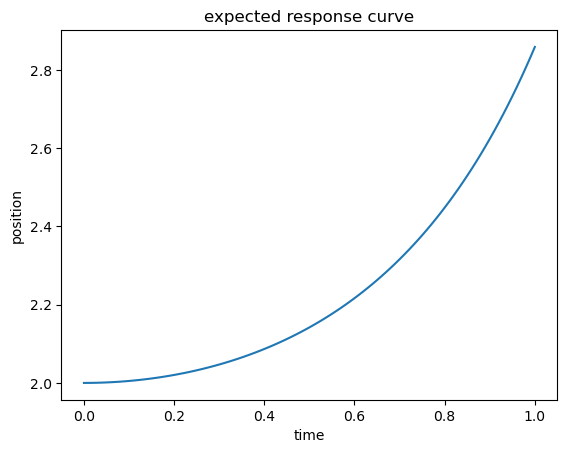

In [40]:
# plot expected curve
fig = plt.plot(t, expected_response)
plt.title('expected response curve')
plt.xlabel('time')
plt.ylabel('position');

Now that we have our expected value we can simulate noise in our data. 
We will do this through introducing random values such that the average should replicate our data.
We will generate 50 samples of the same length as our *t* vector.

$t_{rand} = t * N_{mult}(\mu = 1, \sigma^2 = 0.001) + N_{add}(\mu = 0, \sigma^2 = 0.005)$

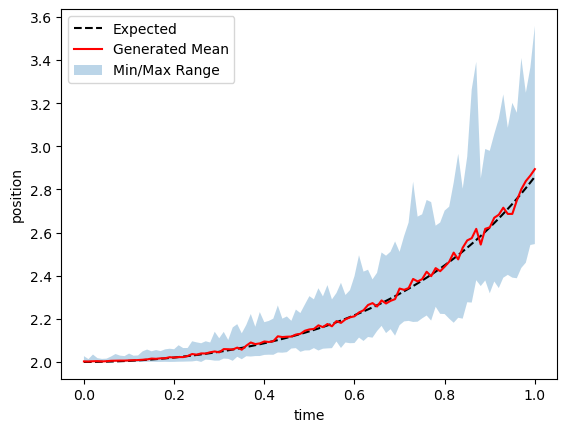

In [41]:
# create the two random arrays of shape 50 x length of the time domain
mult_rand = np.sqrt(0.001) * np.random.randn(50, 101) + 1.
add_rand = np.sqrt(0.005) * np.random.randn(50, 101)

# add noise to the t variable, this will come directly from the equation above
# it's a linear transformation of a*t + b, but using the appropriate NumPy syntax
t_rand = np.multiply(t, mult_rand) + add_rand

# use the same syntax as before to process the randomized time data
# this should be a direct copy from what you have in the previous code snippet
random_response = 0.5 * np.exp(t_rand**2) + 1.5

# find the min, max, and average response at each time step
r_max = np.max(random_response, axis = 0)
r_min = np.min(random_response, axis = 0)
r_avg = np.mean(random_response, axis = 0)

# this plots the output generated above as 
fig = plt.plot(t, expected_response, 'k--', t, r_avg, 'r')
plt.fill_between(t, r_min, r_max, alpha = 0.3)
plt.legend(['Expected', 'Generated Mean', 'Min/Max Range'], loc = 'upper left')
plt.xlabel('time')
plt.ylabel('position');

Let's finally do some procesing so we can finalize our data for output!
We can pretend that the 8th and 23rd sample ranges were done by a trainee that had set the sample frequency to be a little too slow.
We are also limited by our instruments in that they are unreliable when the position is greater than 3.25 so we will remove any samples that reached more than 3.25 at any time in the experiment.
**Side note:** this is not a real example, and data should only be excluded when appropriate.

The number of samples left after removing the bad trainee data is 48
The number of samples left after removing the data > 3.25 is 37
our final_data for output has shape (52, 101)


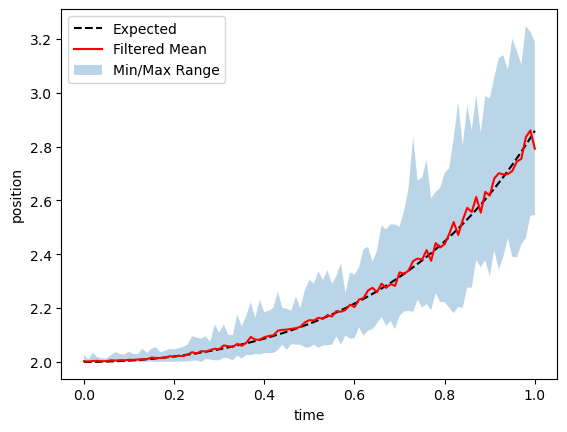

In [42]:
# remove the 8th and 23rd sample rows from the data
exclude_data = np.delete(random_response, [7, 22], axis = 0)

# store the number of samples left over after removing the bad trainee data
# this should be equal to the number of rows left over in the data
number_of_samples = exclude_data.shape[0]
print('The number of samples left after removing the bad trainee data is', number_of_samples)

# we need to find where the remaining data exceeds 3.25, and then delete those rows
# we will then re calculate the number of samples to get an idea for how many samples were removed by this filter
too_big_indices = np.where(exclude_data > 3.25)
exclude_data = np.delete(exclude_data, too_big_indices[0], axis = 0)
number_of_samples = exclude_data.shape[0]
print('The number of samples left after removing the data > 3.25 is', number_of_samples)

# this replots the data to show the results
# any large peaks should be gone now
r_max = np.max(exclude_data, axis = 0)
r_min = np.min(exclude_data, axis = 0)
r_avg = np.mean(exclude_data, axis = 0)
fig = plt.plot(t, expected_response, 'k--', t, r_avg, 'r')
plt.fill_between(t, r_min, r_max, alpha = 0.3)
plt.legend(['Expected', 'Filtered Mean', 'Min/Max Range'],loc = 'upper left')
plt.xlabel('time')
plt.ylabel('position');

# in this final step we will at the time domain on top of rest of the data set 
# this will allow us to save the data in one large array rather than an array for the time
# and an array for the pre-filtered data

# a subtlety of NumPy is that ranges have dimension 1, while our response has two dimensions
# in order for the append function to work we have to make our time domain two dimensional
# which is just 1 x number of time points
# we use reshape here instead of resize because resize will change the original t data
# while reshape will just output a new array of the correct shape
t_vec = t.reshape([1, len(t)]) 

# now we can use append to add the sampled data to the end of the time domain
final_data = np.append(t_vec, random_response, axis = 0)

# this step we realize it might be nice to include the expected response in the output as well
# so it does not have to be generated again later
final_data = np.insert(final_data, 1, expected_response, axis = 0)
          
# so the rows should look like 1: time, 2: expected response, 3-52: sampled data
# step just checks that our final data has the correct shape, 52 x number of time steps
print('our final_data for output has shape', final_data.shape)

# Homework

Here is a website that goes through a good sample of NumPy [problems](https://www.w3schools.com/python/numpy/numpy_exercises.asp). 
It covers some functions that this lesson did not explicitly cover as this lesson tried to introduce some more advanced attributes of NumPy that might be immediately relevant for your data processing.